Segmentation

Simple Linear Iterative Clustering

In [2]:
import numpy as np
from matplotlib import pyplot as plt

##importing skdemo
import imp
skdemo = imp.load_source('~', '_skdemo.py')

In [3]:
plt.rcParams['image.cmap']="spectral"
from skimage import io,segmentation as seg,color

url='spices.jpg'
image=io.imread(url)

In [41]:
plt.clf()

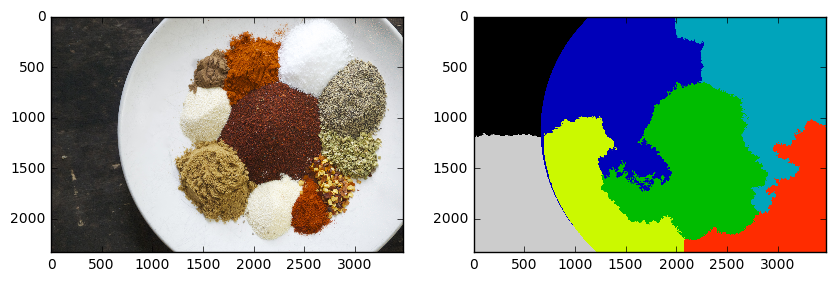

In [5]:
labels=seg.slic(image,n_segments=10,compactness=10)

skdemo.imshow_all(image,labels.astype(float) / labels.max() )
plt.show()

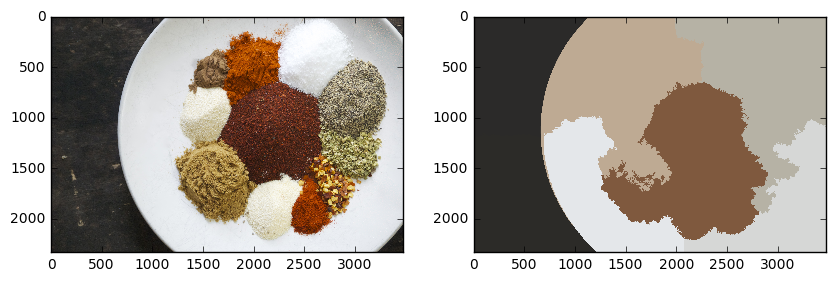

In [6]:
def mean_color(image,labels):
    out=np.zeros_like(image)
    for label in np.unique(labels):
        indices=np.nonzero(labels==label)
        out[indices]=np.mean(image[indices],axis=0)
    return out
skdemo.imshow_all(image,mean_color(image,labels))
plt.show()

             SLIC explorer
 write an interactive tool to explore the SLIC parameter space.A skeleton is given below

In [9]:
from IPython.html import widgets
def func(n_segments,compactness,sigma,enforce_connectivity):
    labels=seg.slic(image,n_segments=n_segments,compactness=40,
                   sigma=2,enforce_connectivity=True)
    label_image=mean_color(image,labels)
    skdemo.imshow_all(image,label_image)
    plt.show()

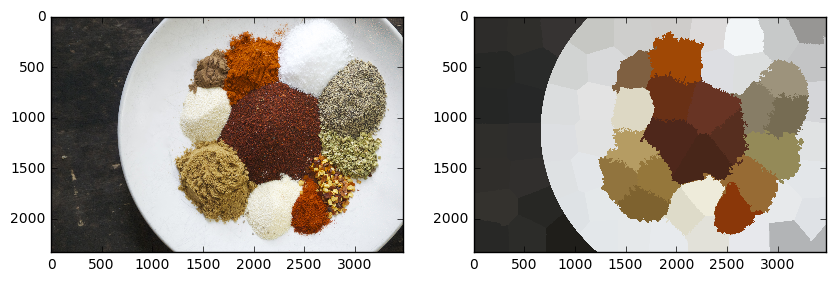

In [10]:
widgets.interact(func,n_segments=24,compactness=40,sigma=2,
                enforce_connectivity=True)

In [11]:
from skimage import data
from skimage import filters
from matplotlib import pyplot as plt,cm


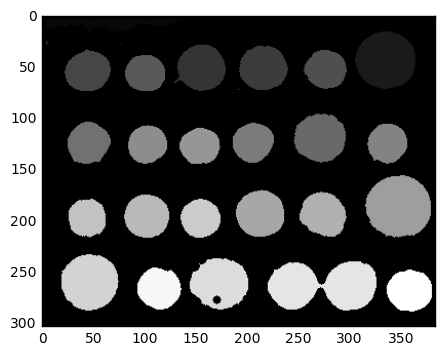

In [70]:
coins=data.coins()
from skimage import img_as_float
from skimage.morphology import binary_closing,disk

edges=filters.sobel(coins)
coins=img_as_float(coins)
structure_element=disk(4)
segmented=binary_closing(coins>0.5,structure_element)
labels,num_labels=ndi.label(segmented)

#plt.imshow(labels,cmap="cubehelix")
plt.imshow(labels,cmap="gray")
plt.show()

seeds: [0 1 0 0 0 0 0 2 0 0 0 3]
seed positions: [ 1  7 11]


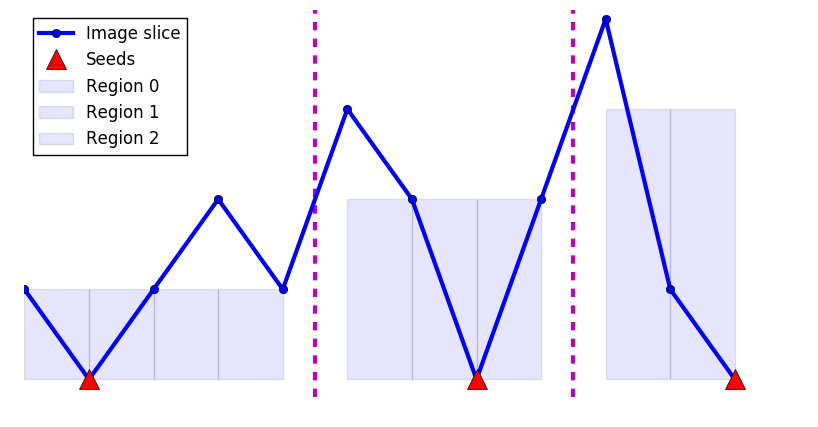

In [65]:
from skimage.morphology import watershed
from scipy import ndimage as ndi
x=np.array([0,1,2,3,4,5,6,7,8,9,10,11])
y=np.array([1,0,1,2,1,3,2,0,2,4,1,0])

seeds=ndi.label(y==0)[0]
seed_positions=np.argwhere(seeds)[:,0]

print("seeds:",seeds)
print("seed positions:",seed_positions)

#
result=watershed(y,seeds)
#

plt.figure(figsize=(10,5))
plt.plot(y,'-o',label="Image slice",linewidth=3)
plt.plot(seed_positions,np.zeros_like(seed_positions),'r^',
        label='Seeds',markersize=15)

for n,label in enumerate(np.unique(result)):
    mask=(result==label)
    plt.bar(x[mask][:-1],result[mask][:-1],
           width=1,label='Region %d'%n,
           alpha=0.1)

plt.vlines(np.argwhere(np.diff(result))+0.5,-0.2,4.1,'m',
          linewidth=3,linestyle='--')

plt.legend(loc='upper left',numpoints=1)
plt.axis('off')
plt.ylim(-0.2,4.1)
plt.show();

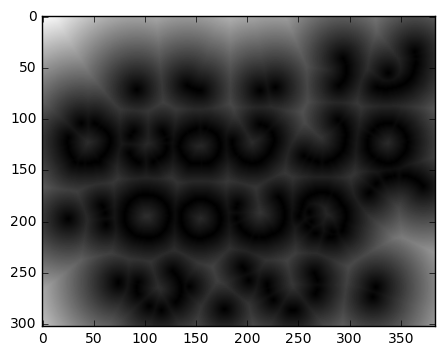

In [66]:
threshold=0.4

#Euclidean distance transform
#how far do we are to travel from a non-edge to find an edge
non_edges=(edges<threshold)
distance_from_edge=ndi.distance_transform_edt(non_edges)

plt.imshow(distance_from_edge,cmap='gray');

plt.show()

Then we find the peaks in that images the background points furthest away from any edges which will act as the seeds


Peaks shape (233, 2)


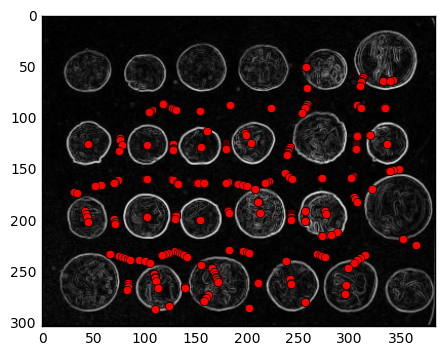

In [67]:
from skimage import feature

peaks=feature.peak_local_max(distance_from_edge)
print("Peaks shape",peaks.shape)


peaks_image=np.zeros(coins.shape,np.bool)
peaks_image[tuple(np.transpose(peaks))]=True
seeds,num_seeds=ndi.label(peaks_image)

plt.imshow(edges,cmap="gray")
plt.plot(peaks[:,1],peaks[:,0],'ro');
plt.axis('image')
plt.show()

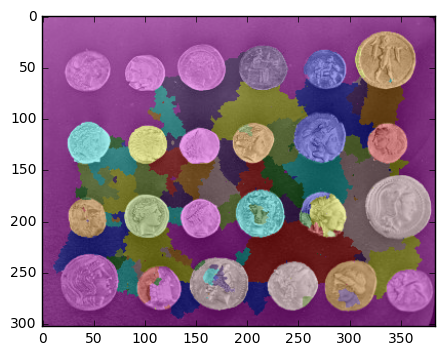

In [68]:
ws=watershed(edges,seeds)
from skimage import color
plt.imshow(color.label2rgb(ws,coins))
plt.show()

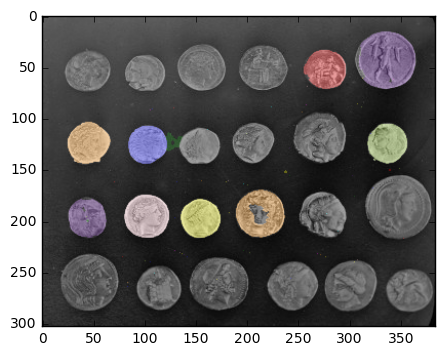

In [69]:
from skimage.measure import regionprops

regions=regionprops(ws)

ws_updated=ws.copy()

for region in regions:
    if region.eccentricity>0.4:
        ws_updated[ws_updated==region.label]=0
        
plt.imshow(color.label2rgb(ws_updated,coins,bg_label=0))
plt.show()